<a id='1'></a><center> <h1 style="background-color:orange; color:white" ><br>In Youtube Trending Analysis<br></h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IN_youtube_trending_data.csv")
df.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


# Getting Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           3999 non-null   object
 1   title              3999 non-null   object
 2   publishedAt        3999 non-null   object
 3   channelId          3999 non-null   object
 4   channelTitle       3999 non-null   object
 5   categoryId         3999 non-null   int64 
 6   trending_date      3999 non-null   object
 7   tags               3999 non-null   object
 8   view_count         3999 non-null   int64 
 9   likes              3999 non-null   int64 
 10  dislikes           3999 non-null   int64 
 11  comment_count      3999 non-null   int64 
 12  thumbnail_link     3999 non-null   object
 13  comments_disabled  3999 non-null   bool  
 14  ratings_disabled   3999 non-null   bool  
 15  description        3954 non-null   object
dtypes: bool(2), int64(5), object(9)
memory usa

In [4]:
df.isnull().sum()

video_id              0
title                 0
publishedAt           0
channelId             0
channelTitle          0
categoryId            0
trending_date         0
tags                  0
view_count            0
likes                 0
dislikes              0
comment_count         0
thumbnail_link        0
comments_disabled     0
ratings_disabled      0
description          45
dtype: int64

# Checking and removing Duplicate values

In [5]:
df.duplicated().sum()

np.int64(4)

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

np.int64(0)

# Filling Na Value 

In [8]:
df["description"] = df["description"].fillna("Not Available")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3995 entries, 0 to 3998
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           3995 non-null   object
 1   title              3995 non-null   object
 2   publishedAt        3995 non-null   object
 3   channelId          3995 non-null   object
 4   channelTitle       3995 non-null   object
 5   categoryId         3995 non-null   int64 
 6   trending_date      3995 non-null   object
 7   tags               3995 non-null   object
 8   view_count         3995 non-null   int64 
 9   likes              3995 non-null   int64 
 10  dislikes           3995 non-null   int64 
 11  comment_count      3995 non-null   int64 
 12  thumbnail_link     3995 non-null   object
 13  comments_disabled  3995 non-null   bool  
 14  ratings_disabled   3995 non-null   bool  
 15  description        3995 non-null   object
dtypes: bool(2), int64(5), object(9)
memory usage: 4

In [10]:
df["publish_date"] = df["publishedAt"].str.split("T").str[0]
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,publish_date
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,2020-08-12
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,2020-08-11
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,2020-08-11
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,2020-08-10
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,2020-08-11


In [11]:
df['published_date'] = df['publishedAt'].str.split("T").str[0]
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,publish_date,published_date
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,2020-08-12,2020-08-12
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,2020-08-11,2020-08-11
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,2020-08-11,2020-08-11
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,2020-08-10,2020-08-10
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,2020-08-11,2020-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,iHeZsS9mQro,"A Day With A Topper Kid | Ft.Viraj Ghelani, Sh...",2020-08-28T07:18:47Z,UCGyEq-EoY4Gn4RfknRQxWYw,RVCJ Media,24,2020-09-01T00:00:00Z,rvcj|rvcj media|rvcj a day with a topper kid|r...,550969,32135,2666,1937,https://i.ytimg.com/vi/iHeZsS9mQro/default.jpg,False,False,"Time to get smarter like Aayush, join BYJU'S C...",2020-08-28,2020-08-28
3995,GZ97lwaslqM,അരാപൈമയുടെ തല ഭ്രാന്തന് കൊടുത്തു 😱 ഒരു പൊളി സാ...,2020-08-27T13:30:53Z,UC-AqAfFvaJEfsMQPqRop7_Q,OMKV Fishing & Cooking,22,2020-09-01T00:00:00Z,Grilled Arapaima Head|Arapaima|arapaima fishin...,583097,26844,746,2259,https://i.ytimg.com/vi/GZ97lwaslqM/default.jpg,False,False,ഷനോ ചേട്ടന്റെ ചാനൽ ലിങ്ക് ഒന്ന് കയറി നോക്കണെ.....,2020-08-27,2020-08-27
3996,39hyvAEkP_4,CID Chhote Heroes | सी. आई. डी. छोटे हीरोज़ | ...,2020-08-29T14:30:00Z,UCV_HCodkhIx43LGAyPENbzA,LIV Kids Hindi,24,2020-09-01T00:00:00Z,C.I.D. Chhote Heroes|crime investigative serie...,147450,618,93,20,https://i.ytimg.com/vi/39hyvAEkP_4/default.jpg,False,False,Click here to Subscribe to LIV Kids Hindi Chan...,2020-08-29,2020-08-29
3997,xRzXt22PG-8,The Showroom | Thangu | Chalu Network,2020-08-28T06:52:33Z,UC_GJadJjdUUJ93Wg2qJ6z3w,Chalu Network,23,2020-09-01T00:00:00Z,chalunetwork|chalu|thangu|chalinetwork|chalu n...,178476,24142,562,1398,https://i.ytimg.com/vi/xRzXt22PG-8/default.jpg,False,False,Download CashKaro App - https://bit.ly/3hBi6oP...,2020-08-28,2020-08-28


In [12]:
df["publish_date"] = pd.to_datetime(df["publish_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3995 entries, 0 to 3998
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           3995 non-null   object        
 1   title              3995 non-null   object        
 2   publishedAt        3995 non-null   object        
 3   channelId          3995 non-null   object        
 4   channelTitle       3995 non-null   object        
 5   categoryId         3995 non-null   int64         
 6   trending_date      3995 non-null   object        
 7   tags               3995 non-null   object        
 8   view_count         3995 non-null   int64         
 9   likes              3995 non-null   int64         
 10  dislikes           3995 non-null   int64         
 11  comment_count      3995 non-null   int64         
 12  thumbnail_link     3995 non-null   object        
 13  comments_disabled  3995 non-null   bool          
 14  ratings_disab

# Importing Seaborn Libray

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
gb = df.groupby("channelTitle").agg({"view_count":"sum"})
gb

,view_count
channelTitle,
10TV News Telugu,16811839
123 GO! CHALLENGE,14904681
123 GO! Hindi,106870270
20th Century Studios,6588866
24 News,4895273
...,...
mcaudiosindia,544625
unknown boy varun,10370589
vedanth jackson,1144112


In [15]:
gb = gb.sort_values(by = "view_count", ascending = False)
gb = gb.head()

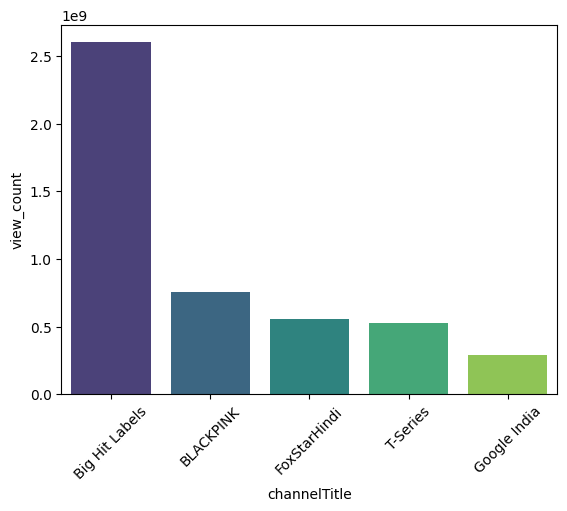

In [16]:
sns.barplot(x = gb.index, y = gb["view_count"], data = gb, hue = gb.index, palette = "viridis")
plt.xticks(rotation = 45)
plt.show()

# Grouping and Sorting based on Title

In [17]:
gb1 = df.groupby("title").agg({"view_count":"sum"})
gb1 = gb1.sort_values(by = "view_count", ascending = False)
gb1 = gb1.head()

In [18]:
gb1

,view_count
title,
BTS (방탄소년단) 'Dynamite' Official MV,1887077945
Sadak 2 | Official Trailer | Sanjay | Pooja | Alia | Aditya | Jisshu | Mahesh Bhatt | 28 Aug,557101795
BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,546924461
BTS (방탄소년단) 'Dynamite' Official Teaser,442478544
Sounds of India | A one of a kind National Anthem,289756242
